<a href="https://colab.research.google.com/github/Ahmad-Shoaib-Amiri/AI-Data-Science-assignments-HBC/blob/main/Fifth_mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

from tensorflow.keras import layers, models

import matplotlib.pyplot as plt

import numpy as np

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()


# Step 2: Preprocess the data

# Normalize the images to be in the range [0, 1]

x_train = x_train / 255.0

x_test = x_test / 255.0


# Reshape the data to include a single channel (since it's grayscale)

x_train = x_train.reshape(-1, 28, 28, 1)

x_test = x_test.reshape(-1, 28, 28, 1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Step 3: Build the Neural Network Model
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),  # Input layer for 28x28 images with 1 channel
    layers.Conv2D(32, (3, 3), activation='relu'),  # 32 filters, 3x3 kernel
    layers.MaxPooling2D((2, 2)),  # Max pooling layer
    layers.Conv2D(64, (3, 3), activation='relu'),  # 64 filters, 3x3 kernel
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # Output layer for 10 classes (digits 0-9)
])

In [4]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)

# Step 6: Evaluate the Model on the Test Set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'\nTest Accuracy: {test_acc:.4f}')

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.8839 - loss: 0.3722 - val_accuracy: 0.9770 - val_loss: 0.0757
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 49s 33ms/step - accuracy: 0.9835 - loss: 0.0537 - val_accuracy: 0.9858 - val_loss: 0.0528
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 48s 32ms/step - accuracy: 0.9894 - loss: 0.0348 - val_accuracy: 0.9901 - val_loss: 0.0369
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 31ms/step - accuracy: 0.9917 - loss: 0.0251 - val_accuracy: 0.9856 - val_loss: 0.0493
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 84s 32ms/step - accuracy: 0.9935 - loss: 0.0197 - val_accuracy: 0.9898 - val_loss: 0.0333
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 56s 37ms/step - accuracy: 0.9944 - loss: 0.0156 - val_accuracy: 0.9895 - val_loss: 0.0384
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 78s 35ms/step - accuracy: 0.9959 - loss: 0.0117 - val_accuracy: 0.9902 - val_loss: 0.0390
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 49s 33ms/step - accuracy: 0.9957 -

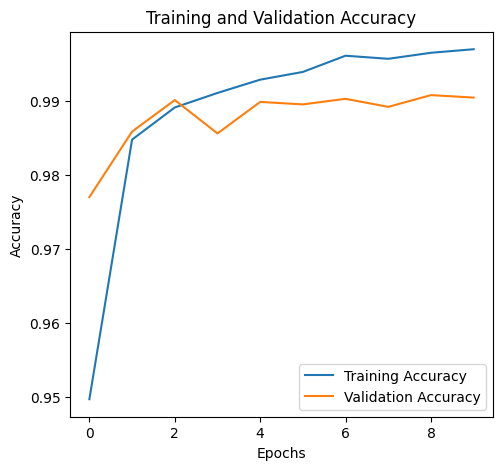

In [6]:
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

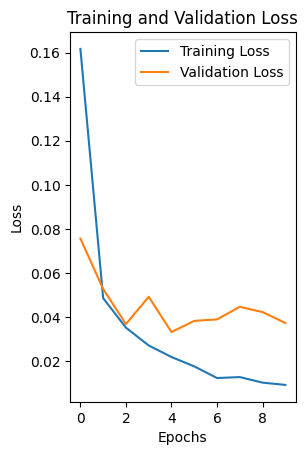

In [7]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


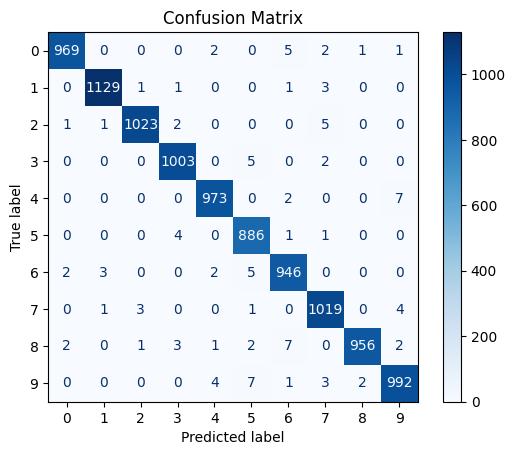

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict the classes for the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.arange(10))
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()